# Auralin Diabetes Analysis

The Auralin and Novodra are not real insulin products. This clinical trial data was fabricated for the sake of this analysis. When assessing this data, the issues that we'll detect (and later clean) are meant to simulate real-world data quality and tidiness issues.

That said:

- This dataset was constructed with the consultation of real doctors to ensure plausibility.
- This clinical trial data for an alternative insulin was inspired and closely mimics this real clinical trial for a new inhaled insulin called Afrezza.
- The data quality issues in this dataset mimic real, common data quality issues in healthcare data. These issues impact quality of care, patient registration, and revenue.
- The patients in this dataset were created using this fake name generator and do not include real names, addresses, phone numbers, emails, etc.


### Dirty Data: 
- Data which has issues with its content is often called low quality data and can include things like inaccurate data, corrupted data and duplicate data.

### Messy Data:
- Data which has issues with its structure. It is often referred to as untidy. Tidy data means each variable forms a column, each observation forms a row and each type of observational unit forms a table. Any other arrangement is messy.

## Quality : Visual Assessment
This Auralin Phase II clinical trial dataset comes in three tables: `patients`, `treatments`, and `adverse_reactions`. Acquaint yourself with them through visual assessment below.

### Gather

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [3]:
patients = pd.read_csv('datasets/patients.csv')
treatments = pd.read_csv('datasets/treatments.csv')
adverse_reactions = pd.read_csv('datasets/adverse_reactions.csv')

### Assess
In the cells below, each column of each table in this clinical trial dataset is described. To see the table that goes hand in hand with these descriptions, display each table in its entirety by displaying the pandas DataFrame that it was gathered into. This task is the mechanical part of visual assessment in pandas.

In [4]:
# Display the patients table
patients

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1
5,6,male,Rafael,Costa,1140 Willis Avenue,Daytona Beach,Florida,32114.0,United States,386-334-5237RafaelCardosoCosta@gustr.com,8/31/1931,183.9,70,26.4
6,7,female,Mary,Adams,3145 Sheila Lane,Burbank,NV,84728.0,United States,775-533-5933MaryBAdams@einrot.com,11/19/1969,146.3,65,24.3
7,8,female,Xiuxiu,Chang,2687 Black Oak Hollow Road,Morgan Hill,CA,95037.0,United States,XiuxiuChang@einrot.com1 408 778 3236,8/13/1958,158.0,60,30.9
8,9,male,Dsvid,Gustafsson,1790 Nutter Street,Kansas City,MO,64105.0,United States,816-265-9578DavidGustafsson@armyspy.com,3/6/1937,163.9,66,26.5
9,10,female,Sophie,Cabrera,3303 Anmoore Road,New York,New York,10011.0,United States,SophieCabreraIbarra@teleworm.us1 718 795 9124,12/3/1930,194.7,64,33.4


`patients` columns:
- **patient_id**: the unique identifier for each patient in the [Master Patient Index](https://en.wikipedia.org/wiki/Enterprise_master_patient_index) (i.e. patient database) of the pharmaceutical company that is producing Auralin
- **assigned_sex**: the assigned sex of each patient at birth (male or female)
- **given_name**: the given name (i.e. first name) of each patient
- **surname**: the surname (i.e. last name) of each patient
- **address**: the main address for each patient
- **city**: the corresponding city for the main address of each patient
- **state**: the corresponding state for the main address of each patient
- **zip_code**: the corresponding zip code for the main address of each patient
- **country**: the corresponding country for the main address of each patient (all United states for this clinical trial)
- **contact**: phone number and email information for each patient
- **birthdate**: the date of birth of each patient (month/day/year). The [inclusion criteria](https://en.wikipedia.org/wiki/Inclusion_and_exclusion_criteria) for this clinical trial is  age >= 18 *(there is no maximum age because diabetes is a [growing problem](http://www.diabetes.co.uk/diabetes-and-the-elderly.html) among the elderly population)*
- **weight**: the weight of each patient in pounds (lbs)
- **height**: the height of each patient in inches (in)
- **bmi**: the Body Mass Index (BMI) of each patient. BMI is a simple calculation using a person's height and weight. The formula is BMI = kg/m<sup>2</sup> where kg is a person's weight in kilograms and m<sup>2</sup> is their height in metres squared. A BMI of 25.0 or more is overweight, while the healthy range is 18.5 to 24.9. *The [inclusion criteria](https://en.wikipedia.org/wiki/Inclusion_and_exclusion_criteria) for this clinical trial is 16 >= BMI >= 38.*

In [5]:
# Display the treatments table
treatments

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32
5,jasmine,sykes,-,42u - 44u,7.56,7.18,0.38
6,sophia,haugen,37u - 42u,-,7.65,7.27,0.38
7,eddie,archer,31u - 38u,-,7.89,7.55,0.34
8,saber,ménard,-,54u - 54u,8.08,7.70,NaN
9,asia,woźniak,30u - 36u,-,7.76,7.37,NaN


350 patients participated in this clinical trial. None of the patients were using Novodra (a popular injectable insulin) or Auralin (the oral insulin being researched) as their primary source of insulin before.  All were experiencing elevated HbA1c levels.

All 350 patients were treated with Novodra to establish a baseline HbA1c level and insulin dose. After four weeks, which isn’t enough time to capture all the change in HbA1c that can be attributed by the switch to Auralin or Novodra:
- 175 patients switched to Auralin for 24 weeks
- 175 patients continued using Novodra for 24 weeks

`treatments` columns:
- **given_name**: the given name of each patient in the Master Patient Index that took part in the clinical trial
- **surname**: the surname of each patient in the Master Patient Index that took part in the clinical trial
- **auralin**: the baseline median daily dose of insulin from the week prior to switching to Auralin (the number before the dash) *and* the ending median daily dose of insulin at the end of the 24 weeks of treatment measured over the 24th week of treatment (the number after the dash). Both are measured in units (shortform 'u'), which is the [international unit](https://en.wikipedia.org/wiki/International_unit) of measurement and the standard measurement for insulin.
- **novodra**: same as above, except for patients that continued treatment with Novodra
- **hba1c_start**: the patient's HbA1c level at the beginning of the first week of treatment. HbA1c stands for Hemoglobin A1c. The [HbA1c test](https://depts.washington.edu/uwcoe/healthtopics/diabetes.html) measures what the average blood sugar has been over the past three months. It is thus a powerful way to get an overall sense of how well diabetes has been controlled. Everyone with diabetes should have this test 2 to 4 times per year. Measured in %.
- **hba1c_end**: the patient's HbA1c level at the end of the last week of treatment
- **hba1c_change**: the change in the patient's HbA1c level from the start of treatment to the end, i.e., `hba1c_start` - `hba1c_end`. For Auralin to be deemed effective, it must be "noninferior" to Novodra, the current standard for insulin. This "noninferiority" is statistically defined as the upper bound of the 95% confidence interval being less than 0.4% for the difference between the mean HbA1c changes for Novodra and Auralin (i.e. Novodra minus Auralin).

In [6]:
# Display the adverse_reactions table
adverse_reactions

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation
5,jasmine,sykes,hypoglycemia
6,louise,johnson,hypoglycemia
7,albinca,komavec,hypoglycemia
8,noe,aranda,hypoglycemia
9,sofia,hermansen,injection site discomfort


`adverse_reactions` columns:
- **given_name**: the given name of each patient in the Master Patient Index that took part in the clinical trial and had an adverse reaction (includes both patients treated Auralin and Novodra)
- **surname**: the surname of each patient in the Master Patient Index that took part in the clinical trial and had an adverse reaction (includes both patients treated Auralin and Novodra)
- **adverse_reaction**: the adverse reaction reported by the patient

Additional useful information:
- [Insulin resistance varies person to person](http://www.tudiabetes.org/forum/t/how-much-insulin-is-too-much-on-a-daily-basis/9804/5), which is why both starting median daily dose and ending median daily dose are required, i.e., to calculate change in dose.
- It is important to test drugs and medical products in the people they are meant to help. People of different age, race, sex, and ethnic group must be included in clinical trials. This [diversity](https://www.clinicalleader.com/doc/an-fda-perspective-on-patient-diversity-in-clinical-trials-0001) is reflected in the `patients` table.
- Ensuring column names are descriptive enough is an important step in acquainting yourself with the data. 'Descriptive enough' is subjective. Ideally you want short column names (so they are easier to type and read in code form) but also fully descriptive. Length vs. descriptiveness is a tradeoff and common debate (a [similar debate](https://softwareengineering.stackexchange.com/questions/176582/is-there-an-excuse-for-short-variable-names) exists for variable names). The *auralin* and *novodra* column names are probably not descriptive enough, but you'll address that later so don't worry about that for now.

### Quality

#### `patients` table:
- zip code is a float not a string
- zip code has four digits sometimes.
- Tim Neudorf height is 27in instead of 72in
- full states names sometimes, abbreviations other times.
- Dsvid gustaffon(Typo)

#### `treatments` table
- missing HbA1c changes.
- The letter u in starting and ending doses for auralin and novodra dosages.
- lower case given names and surnames
- missing data records (280 instead of 350)

#### `adverse_reactions` table:
- lower case given names and surnames


In [7]:
# Tim neudorff issue analysis
# his recorded height is 27in and weight is 192 pounds and given BMI is 26.1

703 * 192/(27*27)

185.15226337448559

which gives an bmi of 185 is not even possible.

In [8]:
# lets take 72 instead of 27 thinking it might be data entry issue
703*192/(72*72)

26.037037037037038

which matches the BMI mentioned above

Another issue was abbreviations which can be noticed for states Newyork some times entered as NY

## Data Quality Dimensions

Data quality dimensions help guide your thought process while assessing and also cleaning. The four main data quality dimensions are:

   - **`Completeness`**: do we have all of the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing?
   - **`Validity`**: we have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables).
   - **`Accuracy`**: inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. Example: a patient's weight that is 5 lbs too heavy because the scale was faulty.
   - **`Consistency`**: inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired.


## Quality: Programmatic Assessments in pandas


#### `patients` table:
- zip code is a float not a string
- zip code has four digits sometimes.
- Tim Neudorf height is 27in instead of 72in
- full states names sometimes, abbreviations other times.
- Dsvid gustaffon(Typo)
- Missing Demographic information (address - contact columns)
- Erroneous datatypes(assigned sex, state, zip_code, birthdate)
- multiple phone number formats
- Default John Doe data
- Multiple records for Jacobsen, Gersten, Taylor
- kgs instead of lbs for Zaitseva weight

#### `treatments` table
- missing HbA1c changes.
- The letter u in starting and ending doses for auralin and novodra dosages.
- lower case given names and surnames
- missing data records (280 instead of 350)
- Erroneous datatypes(auralin and novodra columns)
- Inaccurate HbA1c changes(4's mistakes as 9's)
- Nulls represented as dashes(-) in auralin and novodra columns.

#### `adverse_reactions` table:
- lower case given names and surnames


### Assess
These are the programmatic assessment methods in pandas that you will probably use most often:

* .head (DataFrame and Series)
* .tail (DataFrame and Series)
* .sample (DataFrame and Series)
* .info (DataFrame only)
* .describe (DataFrame and Series)
* .value_counts (Series only)
* Various methods of indexing and selecting data (.loc and bracket notation with/without boolean indexing, also .iloc)

Try them out below and keep their results in mind. Some will come in handy later in the lesson.

Check out the [pandas API reference](https://pandas.pydata.org/pandas-docs/stable/api.html) for detailed usage information.

In [9]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
patient_id      503 non-null int64
assigned_sex    503 non-null object
given_name      503 non-null object
surname         503 non-null object
address         491 non-null object
city            491 non-null object
state           491 non-null object
zip_code        491 non-null float64
country         491 non-null object
contact         491 non-null object
birthdate       503 non-null object
weight          503 non-null float64
height          503 non-null int64
bmi             503 non-null float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


In [10]:
treatments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
given_name      280 non-null object
surname         280 non-null object
auralin         280 non-null object
novodra         280 non-null object
hba1c_start     280 non-null float64
hba1c_end       280 non-null float64
hba1c_change    171 non-null float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


In [11]:
adverse_reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
given_name          34 non-null object
surname             34 non-null object
adverse_reaction    34 non-null object
dtypes: object(3)
memory usage: 896.0+ bytes


In [12]:
patients[patients['address'].isnull()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
209,210,female,Lalita,Eldarkhanov,NaN,NaN,NaN,NaN,NaN,NaN,8/14/1950,143.4,62,26.2
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
257,258,male,Jin,Kung,NaN,NaN,NaN,NaN,NaN,NaN,5/17/1995,231.7,69,34.2
264,265,female,Wafiyyah,Asfour,NaN,NaN,NaN,NaN,NaN,NaN,11/3/1989,158.6,63,28.1
269,270,female,Flavia,Fiorentino,NaN,NaN,NaN,NaN,NaN,NaN,10/9/1937,175.2,61,33.1
278,279,female,Generosa,Cabán,NaN,NaN,NaN,NaN,NaN,NaN,12/16/1962,124.3,69,18.4


In [13]:
treatments.describe()

,hba1c_start,hba1c_end,hba1c_change
count,280.000000,280.000000,171.000000
mean,7.985929,7.589286,0.546023
std,0.568638,0.569672,0.279555
min,7.500000,7.010000,0.200000
25%,7.660000,7.270000,0.340000
50%,7.800000,7.420000,0.380000
75%,7.970000,7.570000,0.920000
max,9.950000,9.580000,0.990000


In [14]:
patients.describe()

,patient_id,zip_code,weight,height,bmi
count,503.000000,491.000000,503.000000,503.000000,503.000000
mean,252.000000,49084.118126,173.434990,66.634195,27.483897
std,145.347859,30265.807442,33.916741,4.411297,5.276438
min,1.000000,1002.000000,48.800000,27.000000,17.100000
25%,126.500000,21920.500000,149.300000,63.000000,23.300000
50%,252.000000,48057.000000,175.300000,67.000000,27.200000
75%,377.500000,75679.000000,199.500000,70.000000,31.750000
max,503.000000,99701.000000,255.900000,79.000000,37.700000


In [15]:
patients.surname.value_counts()

Doe              6
Taylor           3
Jakobsen         3
Woźniak          2
Berg             2
Dratchev         2
Tạ               2
Parker           2
Lâm              2
Hueber           2
Souza            2
Nilsen           2
Grímsdóttir      2
Batukayev        2
Silva            2
Cindrić          2
Ogochukwu        2
Lương            2
Bùi              2
Schiavone        2
Tucker           2
Lund             2
Gersten          2
Liễu             2
Correia          2
Johnson          2
Collins          2
Kadyrov          2
Kowalczyk        2
Cabrera          2
                ..
Labrosse         1
Koffeman         1
Sultygov         1
Hughes           1
Novosel          1
Cumpston         1
van der Lubbe    1
Enríquez         1
Reilly           1
Tikhonov         1
Eldarkhanov      1
Cain             1
Murakami         1
Komavec          1
Ingason          1
Chandler         1
Takenaka         1
Tuma             1
Vaara            1
Pecinová         1
Guðjónsdóttir    1
Haugen      

In [16]:
patients.address.value_counts()

123 Main Street               6
648 Old Dear Lane             2
2476 Fulton Street            2
2778 North Avenue             2
1904 Granville Lane           1
383 Marion Street             1
4435 Poe Road                 1
1463 Beechwood Avenue         1
2102 Geraldine Lane           1
944 Thrash Trail              1
3710 Jerry Dove Drive         1
3214 Better Street            1
2945 Ferguson Street          1
3686 Meadowcrest Lane         1
3343 Jefferson Street         1
4707 Parkway Street           1
1370 Flint Street             1
602 Tator Patch Road          1
2884 Elsie Drive              1
1168 Stout Street             1
3636 Junior Avenue            1
954 Summit Park Avenue        1
4018 Poplar Avenue            1
1014 Locust Court             1
1829 Bungalow Road            1
3216 Lodgeville Road          1
2687 Black Oak Hollow Road    1
4105 Ferguson Street          1
312 Jim Rosa Lane             1
4988 Lynn Street              1
                             ..
510 Berr

In [17]:
patients[patients.address.duplicated()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771.0,United States,JakobCJakobsen@einrot.com+1 (845) 858-7707,8/1/1985,155.8,67,24.4
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
229,230,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
237,238,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
244,245,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
251,252,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4


- Default John Doe data
- Multiple records for Jacobsen, Gersten, Taylor

In [18]:
patients.weight.sort_values()

210     48.8
459    102.1
335    102.7
74     103.2
317    106.0
171    106.5
51     107.1
270    108.1
198    108.5
48     109.1
478    109.6
141    110.2
38     111.8
438    112.0
14     112.0
235    112.2
307    112.4
191    112.6
408    113.1
49     113.3
326    114.0
338    114.1
253    117.0
321    118.4
168    118.8
1      118.8
350    119.0
207    119.2
265    120.0
341    120.3
       ...  
332    224.0
252    224.2
12     224.2
222    224.8
166    225.3
111    225.9
101    226.2
150    226.6
352    227.7
428    227.7
88     227.7
13     228.4
339    229.0
182    230.3
121    230.8
257    231.7
395    231.9
246    232.1
219    237.8
11     238.7
50     238.9
441    239.1
499    239.6
439    242.0
487    242.4
144    244.9
61     244.9
283    245.5
118    254.5
485    255.9
Name: weight, Length: 503, dtype: float64

In [19]:
weight_lbs = patients[patients.surname == 'Zaitseva'].weight * 2.20462
height_in = patients[patients.surname == 'Zaitseva'].height
bmi_check = 703* weight_lbs / (height_in * height_in)
bmi_check

210    19.055827
dtype: float64

In [20]:
patients[patients.surname == 'Zaitseva'].bmi

210    19.1
Name: bmi, dtype: float64

so from above analyis it is quite clear that 48.8 is correct weight but off units. all the remaining weights are in pounds where as 48.8 is kg's. Hence when converted to pounds and bmi is calculated it is equal to bmi in data.

In [21]:
treatments.auralin.isnull().sum()

0

In [22]:
treatments.novodra.isnull().sum()

0

In [23]:
treatments

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32
5,jasmine,sykes,-,42u - 44u,7.56,7.18,0.38
6,sophia,haugen,37u - 42u,-,7.65,7.27,0.38
7,eddie,archer,31u - 38u,-,7.89,7.55,0.34
8,saber,ménard,-,54u - 54u,8.08,7.70,NaN
9,asia,woźniak,30u - 36u,-,7.76,7.37,NaN


- Nulls represented as dashes(-) in auralin and novodra columns.

## Tidiness:

- contact column in patients table should be split into phone number and email
- three variables in two columns in treatments table (treatment, start dose and end dose)

In [24]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
patient_id      503 non-null int64
assigned_sex    503 non-null object
given_name      503 non-null object
surname         503 non-null object
address         491 non-null object
city            491 non-null object
state           491 non-null object
zip_code        491 non-null float64
country         491 non-null object
contact         491 non-null object
birthdate       503 non-null object
weight          503 non-null float64
height          503 non-null int64
bmi             503 non-null float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


In [25]:
treatments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
given_name      280 non-null object
surname         280 non-null object
auralin         280 non-null object
novodra         280 non-null object
hba1c_start     280 non-null float64
hba1c_end       280 non-null float64
hba1c_change    171 non-null float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


In [26]:
adverse_reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
given_name          34 non-null object
surname             34 non-null object
adverse_reaction    34 non-null object
dtypes: object(3)
memory usage: 896.0+ bytes


**Duplicate column names can be found more generally in pandas , using the following code:**

In [27]:
all_columns = pd.Series(list(patients) + list(treatments) + list(adverse_reactions))
all_columns[all_columns.duplicated()]

14    given_name
15       surname
21    given_name
22       surname
dtype: object

The first line creates a list of all of the column names across the whole dataset, all three tables worth. Puts it into a series . Then we use the .duplicated() method on series and see that given name and surname are duplicated. Hence we remove given name and surname from treatments table and join adverse_reactions table to treatments table. We can only one foreign key between primary and treatments table which would be patient_id. And finally only two tables.

#### Quality
##### `patients` table
- Zip code is a float not a string
- Zip code has four digits sometimes
- Tim Neudorf height is 27 in instead of 72 in
- Full state names sometimes, abbreviations other times
- Dsvid Gustafsson
- Missing demographic information (address - contact columns) ***(can't clean)***
- Erroneous datatypes (assigned sex, state, zip_code, and birthdate columns)
- Multiple phone number formats
- Default John Doe data
- Multiple records for Jakobsen, Gersten, Taylor
- kgs instead of lbs for Zaitseva weight

##### `treatments` table
- Missing HbA1c changes
- The letter 'u' in starting and ending doses for Auralin and Novodra
- Lowercase given names and surnames
- Missing records (280 instead of 350)
- Erroneous datatypes (auralin and novodra columns)
- Inaccurate HbA1c changes (leading 4s mistaken as 9s)
- Nulls represented as dashes (-) in auralin and novodra columns

##### `adverse_reactions` table
- Lowercase given names and surnames

#### Tidiness
- Contact column in `patients` table should be split into phone number and email
- Three variables in two columns in `treatments` table (treatment, start dose and end dose)
- Adverse reaction should be part of the `treatments` table
- Given name and surname columns in `patients` table duplicated in `treatments` and `adverse_reactions` tables

# Data Cleaning

In [70]:
patients_clean = patients.copy()
treatments_clean = treatments.copy()
adverse_clean = adverse_reactions.copy()

## Missing Data

### 1.  `treatments`: Missing records (280 instead of 350)

##### Define

import the treatments_cut.csv which has missing treatment files and store it in a dataframe. concatenate the treatments dataframe with this dataframe

##### Code

In [71]:
df = pd.read_csv('datasets/treatments_cut.csv')
df.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,jožka,resanovič,22u - 30u,-,7.56,7.22,0.34
1,inunnguaq,heilmann,57u - 67u,-,7.85,7.45,NaN
2,alwin,svensson,36u - 39u,-,7.78,7.34,NaN
3,thể,lương,-,61u - 64u,7.64,7.22,0.92
4,amanda,ribeiro,36u - 44u,-,7.85,7.47,0.38


In [72]:
treatments_clean = pd.concat([treatments_clean,df],ignore_index=True)

In [73]:
treatments_clean.shape

(350, 7)

### 2. `treatments`: Missing HbA1c changes and Inaccurate HbA1c changes (leading 4s mistaken as 9s)
*Note: the "Inaccurate HbA1c changes (leading 4s mistaken as 9s)" observation, which is an accuracy issue and not a completeness issue, is included in this header because it is also fixed by the cleaning operation that fixes the missing "Missing HbA1c changes" observation. Multiple observations in one **Define, Code, and Test** header occurs multiple times in this notebook.*

##### Define
subtract the values of HbA1c_end values from HbA1c_start values to recalculate the values of HbA1c_change

##### Code

In [74]:
treatments_clean['hba1c_change'] = treatments_clean['hba1c_start'] - treatments_clean['hba1c_end']

In [75]:
treatments_clean

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,0.43
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.47
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,0.43
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32
5,jasmine,sykes,-,42u - 44u,7.56,7.18,0.38
6,sophia,haugen,37u - 42u,-,7.65,7.27,0.38
7,eddie,archer,31u - 38u,-,7.89,7.55,0.34
8,saber,ménard,-,54u - 54u,8.08,7.70,0.38
9,asia,woźniak,30u - 36u,-,7.76,7.37,0.39


In [76]:
treatments_clean.hba1c_change.isnull().sum()

0

## Tidiness

### 3. Contact column in `patients` table contains two variables: phone number and email

##### Define
Extract the *phone number* and *email* variables from the *contact* column using regular expressions and pandas' `str.extract` method. Drop the *contact* column when done.

Hint 1: use regular expressions with pandas' [`str.extract` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.extract.html). Here is an amazing [regex tutorial](https://regexone.com/). Hint 2: [various phone number regex patterns](https://stackoverflow.com/questions/16699007/regular-expression-to-match-standard-10-digit-phone-number). Hint 3: [email address regex pattern](http://emailregex.com/), which you might need to modify to distinguish the email from the phone number.*

##### Code

In [77]:
patients_clean['phone_number'] = patients_clean.contact.str.extract('((?:\+\d{1,2}\s)?\(?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4})', expand=True)

# [a-zA-Z] to signify emails in this dataset all start and end with letters
patients_clean['email'] = patients_clean.contact.str.extract('([a-zA-Z][a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+[a-zA-Z])', expand=True)

# Note: axis=1 denotes that we are referring to a column, not a row
patients_clean = patients_clean.drop('contact', axis=1)

In [78]:
patients_clean.columns

Index(['patient_id', 'assigned_sex', 'given_name', 'surname', 'address',
       'city', 'state', 'zip_code', 'country', 'birthdate', 'weight', 'height',
       'bmi', 'phone_number', 'email'],
      dtype='object')

In [79]:
patients_clean

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,7/10/1976,121.7,66,19.6,951-719-9170,ZoeWellish@superrito.com
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,4/3/1967,118.8,66,19.2,+1 (217) 569-3204,PamelaSHill@cuvox.de
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,2/19/1980,177.8,71,24.8,402-363-6804,JaeMDebord@gustr.com
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,7/26/1951,220.9,70,31.7,+1 (732) 636-8246,PhanBaLiem@jourrapide.com
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,2/18/1928,192.3,27,26.1,334-515-7487,TimNeudorf@cuvox.de
5,6,male,Rafael,Costa,1140 Willis Avenue,Daytona Beach,Florida,32114.0,United States,8/31/1931,183.9,70,26.4,386-334-5237,RafaelCardosoCosta@gustr.com
6,7,female,Mary,Adams,3145 Sheila Lane,Burbank,NV,84728.0,United States,11/19/1969,146.3,65,24.3,775-533-5933,MaryBAdams@einrot.com
7,8,female,Xiuxiu,Chang,2687 Black Oak Hollow Road,Morgan Hill,CA,95037.0,United States,8/13/1958,158.0,60,30.9,408 778 3236,XiuxiuChang@einrot.com
8,9,male,Dsvid,Gustafsson,1790 Nutter Street,Kansas City,MO,64105.0,United States,3/6/1937,163.9,66,26.5,816-265-9578,DavidGustafsson@armyspy.com
9,10,female,Sophie,Cabrera,3303 Anmoore Road,New York,New York,10011.0,United States,12/3/1930,194.7,64,33.4,718 795 9124,SophieCabreraIbarra@teleworm.us


### 4. Three variables in two columns in `treatments` table (treatment, start dose and end dose)

##### Define

Melt the *auralin* and *novodra* columns to a *treatment* and a *dose* column (dose will still contain both start and end dose at this point). Then split the dose column on ' - ' to obtain *start_dose* and *end_dose* columns. Drop the intermediate *dose* column.

Hint: use pandas' [melt function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html) and [`str.split()` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.split.html). Here is an excellent [`melt` tutorial](https://deparkes.co.uk/2016/10/28/reshape-pandas-data-with-melt/).*

##### Code

In [80]:
treatments_clean.head(2)

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,0.43
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.47


In [81]:
treatments_clean = pd.melt(treatments_clean,id_vars=['given_name','surname','hba1c_start','hba1c_end','hba1c_change'],
                          var_name = 'treatment',value_name = 'dose')

In [82]:
treatments_clean

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u - 48u
1,elliot,richardson,7.56,7.09,0.47,auralin,-
2,yukitaka,takenaka,7.68,7.25,0.43,auralin,-
3,skye,gormanston,7.97,7.62,0.35,auralin,33u - 36u
4,alissa,montez,7.78,7.46,0.32,auralin,-
5,jasmine,sykes,7.56,7.18,0.38,auralin,-
6,sophia,haugen,7.65,7.27,0.38,auralin,37u - 42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u - 38u
8,saber,ménard,8.08,7.70,0.38,auralin,-
9,asia,woźniak,7.76,7.37,0.39,auralin,30u - 36u


In [83]:
# remove the records with dose values (-) as those are duplicated records.
# those are records for which one drug is used and its dose is stored 
# and other drugs dose would be -
treatments_clean = treatments_clean[treatments_clean.dose != '-']

In [84]:
treatments_clean

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u - 48u
3,skye,gormanston,7.97,7.62,0.35,auralin,33u - 36u
6,sophia,haugen,7.65,7.27,0.38,auralin,37u - 42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u - 38u
9,asia,woźniak,7.76,7.37,0.39,auralin,30u - 36u
10,joseph,day,7.70,7.19,0.51,auralin,29u - 36u
12,roxanne,andreyeva,9.54,9.14,0.40,auralin,29u - 38u
14,simone,baumgaertner,7.74,7.30,0.44,auralin,27u - 37u
15,enco,žibrik,7.78,7.34,0.44,auralin,55u - 68u
16,camilla,zaitseva,7.53,7.13,0.40,auralin,28u - 37u


In [85]:
treatments_clean['dose_start'], treatments_clean['dose_end'] = treatments_clean['dose'].str.split(' - ', 1).str

/home/bikumalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [86]:
treatments_clean = treatments_clean.drop('dose',axis=1)

In [87]:
treatments_clean.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u,48u
3,skye,gormanston,7.97,7.62,0.35,auralin,33u,36u
6,sophia,haugen,7.65,7.27,0.38,auralin,37u,42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u,38u
9,asia,woźniak,7.76,7.37,0.39,auralin,30u,36u


### 5. Adverse reaction should be part of the `treatments` table

##### Define
Merge the *adverse_reaction* column to the `treatments` table, joining on *given name* and *surname*.

In [88]:
treatments_clean = pd.merge(treatments_clean,adverse_clean,on=['given_name','surname'],how='left')

In [89]:
treatments_clean

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u,48u,NaN
1,skye,gormanston,7.97,7.62,0.35,auralin,33u,36u,NaN
2,sophia,haugen,7.65,7.27,0.38,auralin,37u,42u,NaN
3,eddie,archer,7.89,7.55,0.34,auralin,31u,38u,NaN
4,asia,woźniak,7.76,7.37,0.39,auralin,30u,36u,NaN
5,joseph,day,7.70,7.19,0.51,auralin,29u,36u,hypoglycemia
6,roxanne,andreyeva,9.54,9.14,0.40,auralin,29u,38u,NaN
7,simone,baumgaertner,7.74,7.30,0.44,auralin,27u,37u,NaN
8,enco,žibrik,7.78,7.34,0.44,auralin,55u,68u,NaN
9,camilla,zaitseva,7.53,7.13,0.40,auralin,28u,37u,NaN


### 6. Given name and surname columns in `patients` table duplicated in `treatments` and `adverse_reactions` tables  and Lowercase given names and surnames

##### Define

Adverse reactions table is no longer needed so ignore that part. Isolate the patient ID and names in the `patients` table, then convert these names to lower case to join with `treatments`. Then drop the given name and surname columns in the treatments table (so these being lowercase isn't an issue anymore).

In [90]:
patients_clean.sample(5)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
424,425,female,Krystiana,Kozłowska,2935 Diamond Cove,Providence,RI,2906.0,United States,11/8/1921,123.6,63,21.9,+1 (401) 419-2975,KrystianaKozlowska@cuvox.de
224,225,female,Veronika,Jindrová,3641 Selah Way,Brattleboro,VT,5301.0,United States,1/15/1981,171.4,62,31.3,802-614-0812,VeronikaJindrova@jourrapide.com
71,72,male,Leuco,Miranda,90 Meadow View Drive,Hartford,CT,6103.0,United States,2/2/1976,184.8,72,25.1,860-515-0122,LeucoMirandaNieto@teleworm.us
435,436,female,Ivana,Kašná,3343 Jefferson Street,Newport News,VA,23601.0,United States,8/15/1995,173.8,67,27.2,+1 (757) 736-7026,IvanaKasna@teleworm.us
111,112,female,Nicole,Zimmerman,909 Williams Avenue,Newhall,California,91321.0,United States,1/14/1984,225.9,74,29.0,661-291-1812,NicoleZimmerman@rhyta.com


In [91]:
id_names = patients_clean[['patient_id','given_name','surname']]
id_names.given_name = id_names.given_name.str.lower()
id_names.surname = id_names.surname.str.lower()

In [92]:
id_names.sample(5)

,patient_id,given_name,surname
313,314,mgbankwo,afamefuna
197,198,thể,lương
502,503,pat,gersten
440,441,david,villadsen
432,433,karen,jakobsen


In [93]:
treatments_clean = pd.merge(id_names,treatments_clean,on=['given_name','surname'])

In [94]:
treatments_clean = treatments_clean.drop(['given_name','surname'],axis=1)

In [95]:
treatments_clean.head()

,patient_id,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction
0,1,7.71,7.30,0.41,novodra,33u,33u,NaN
1,2,9.53,9.10,0.43,novodra,27u,29u,NaN
2,4,7.58,7.10,0.48,novodra,43u,48u,NaN
3,6,7.73,7.34,0.39,auralin,50u,60u,NaN
4,7,7.65,7.26,0.39,novodra,32u,33u,NaN


## Quality

### 7. `patients` table :Zip code is a float not a string and Zip code has four digits sometimes

##### Define
Convert the zip code column's data type from a float to a string using `astype`, remove the '.0' using string slicing, and pad four digit zip codes with a leading 0.

In [96]:
patients_clean.zip_code.isnull().sum()

12

In [97]:
# convert to string
patients_clean.zip_code = patients_clean.zip_code.astype(str)

In [98]:
patients_clean.dtypes

patient_id        int64
assigned_sex     object
given_name       object
surname          object
address          object
city             object
state            object
zip_code         object
country          object
birthdate        object
weight          float64
height            int64
bmi             float64
phone_number     object
email            object
dtype: object

In [99]:
# remove the '.0' using string slicing
patients_clean.zip_code = patients_clean.zip_code.str[:-2]

In [100]:
patients_clean.zip_code.sample(5)

196    78702
352    31401
264        n
354     7102
478    95134
Name: zip_code, dtype: object

In [101]:
# pad 4 digit zip code with leading zero using pad function
patients_clean.zip_code = patients_clean.zip_code.str.pad(5,fillchar='0')

In [102]:
# initially we had 12 null values in zip code column
# after the above padding is done the nullvalues are replaced with 0000n 
# so, we have to again replace the null values
patients_clean.zip_code = patients_clean.zip_code.replace('0000n', np.nan)

In [103]:
patients_clean.sample(5)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
64,65,male,Jaakko,Eskelinen,4324 Oak Street,Syracuse,NY,13221,United States,2/26/1971,163.7,68,24.9,+1 (315) 362-5858,JaakkoEskelinen@superrito.com
502,503,male,Pat,Gersten,2778 North Avenue,Burr,Nebraska,68324,United States,5/3/1954,138.2,71,19.3,402-848-4923,PatrickGersten@rhyta.com
379,380,female,Rovzan,Kishiev,4220 Simpson Square,Sulphur,OK,73086,United States,7/13/1982,136.0,63,24.1,580-622-5674,RovzanKishiev@armyspy.com
186,187,female,Jane,Citizen,2866 Myra Street,Providence,RI,02908,United States,9/27/1974,143.0,65,23.8,+1 (401) 485-6384,JaneCitizen@cuvox.de
390,391,male,Hideki,Haraguchi,3995 Colonial Drive,La Grange,TX,78945,United States,2/13/1997,181.3,67,28.4,979-639-7844,HidekiHaraguchi@einrot.com


### 8. `patients` table:  Tim Neudorf height is 27 in instead of 72 in

##### Define
Replace height for rows in the `patients` table that have a height of 27 in (there is only one) with 72 in.

In [105]:
patients_clean.height = patients_clean.height.replace(27, 72)

In [106]:
# Should be empty
patients_clean[patients_clean.height == 27]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email


In [107]:
# Confirm the replacement worked
patients_clean[patients_clean.surname == 'Neudorf']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,2/18/1928,192.3,72,26.1,334-515-7487,TimNeudorf@cuvox.de


### 9. `patients` table: Full state names sometimes, abbreviations other times

##### Define
Apply a function that converts full state name to state abbreviation for California, New York, Illinois, Florida, and Nebraska.

Hint: [tutorial](https://chrisalbon.com/python/pandas_apply_operations_to_dataframes.html) for method used in solution.*

In [108]:
# Mapping from full state name to abbreviation
state_abbrev = {'California': 'CA',
                'New York': 'NY',
                'Illinois': 'IL',
                'Florida': 'FL',
                'Nebraska': 'NE'}

# Function to apply
def abbreviate_state(patient):
    if patient['state'] in state_abbrev.keys():
        abbrev = state_abbrev[patient['state']]
        return abbrev
    else:
        return patient['state']
    
patients_clean['state'] = patients_clean.apply(abbreviate_state, axis=1)

In [109]:
patients_clean.state.unique()

array(['CA', 'IL', 'NE', 'NJ', 'AL', 'FL', 'NV', 'MO', 'NY', 'MI', 'TN',
       'VA', 'OK', 'GA', 'MT', 'MA', 'NM', 'LA', 'PA', 'CO', 'ME', 'WI',
       'SD', 'MN', 'WY', 'OH', 'IA', 'NC', 'IN', 'CT', 'KY', 'DE', 'MD',
       'AZ', 'TX', 'AK', 'ND', 'KS', 'MS', 'WA', 'SC', 'WV', 'RI', 'NH',
       'OR', nan, 'VT', 'ID', 'DC', 'AR'], dtype=object)

### 10. `patients` table: Dsvid Gustafsson

##### Define
Replace given name for rows in the `patients` table that have a given name of 'Dsvid' with 'David'.

In [111]:
patients_clean.given_name = patients_clean.given_name.replace('Dsvid','David')

In [112]:
patients_clean[patients_clean.given_name == 'Dsvid']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email


### 11. Erroneous datatypes (assigned sex, state, zip_code, and birthdate columns) and Erroneous datatypes (auralin and novodra columns) and The letter 'u' in starting and ending doses for Auralin and Novodra

##### Define
Convert assigned sex and state to categorical data types. Zip code data type was already addressed above. Convert birthdate to datetime data type. Strip the letter 'u' in start dose and end dose and convert those columns to data type integer.

Hint: [documentation page](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.astype.html) for astype method used in solution, [documentation page](http://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.to_datetime.html) for to_datetime function used in the solution, and [documentation page](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.strip.html) for str.strip method used in the solution.

##### Code

In [113]:
# To category
patients_clean.assigned_sex = patients_clean.assigned_sex.astype('category')
patients_clean.state = patients_clean.state.astype('category')

# To datetime
patients_clean.birthdate = pd.to_datetime(patients_clean.birthdate)

# Strip u and to integer
treatments_clean.dose_start = treatments_clean.dose_start.str.strip('u').astype(int)
treatments_clean.dose_end = treatments_clean.dose_end.str.strip('u').astype(int)

In [114]:
patients_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 15 columns):
patient_id      503 non-null int64
assigned_sex    503 non-null category
given_name      503 non-null object
surname         503 non-null object
address         491 non-null object
city            491 non-null object
state           491 non-null category
zip_code        491 non-null object
country         491 non-null object
birthdate       503 non-null datetime64[ns]
weight          503 non-null float64
height          503 non-null int64
bmi             503 non-null float64
phone_number    491 non-null object
email           491 non-null object
dtypes: category(2), datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 53.9+ KB


In [115]:
treatments_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 0 to 348
Data columns (total 8 columns):
patient_id          349 non-null int64
hba1c_start         349 non-null float64
hba1c_end           349 non-null float64
hba1c_change        349 non-null float64
treatment           349 non-null object
dose_start          349 non-null int64
dose_end            349 non-null int64
adverse_reaction    35 non-null object
dtypes: float64(3), int64(3), object(2)
memory usage: 24.5+ KB


### 12. `patients` table: Multiple phone number formats`

##### Define


Hint: helpful [Stack Overflow answer](https://stackoverflow.com/a/123681).*

In [117]:
patients_clean.phone_number.sample(5)

144         260-591-5755
220    +1 (707) 896-9250
219                  NaN
77          859-297-3368
274         740-552-2444
Name: phone_number, dtype: object

In [118]:
patients_clean.phone_number = patients_clean.phone_number.str.replace(r'\D+','')

In regex, the uppercase metacharacter is always the inverse of the lowercase counterpart. \d (digit) matches any single digit (same as [0-9] ). The uppercase counterpart \D (non-digit) matches any single character that is not a digit (same as [^0-9] ).

In [119]:
patients_clean.phone_number.sample(5)

139    15133830516
484     3366972005
428     4123190903
3      17326368246
163     8037121180
Name: phone_number, dtype: object

In [120]:
# we have some numbers with length 11 and some others with length 10 
# 11 digit numbers have 1 as leading which is country code
# lets pad 1 to all numbers with length 10
patients_clean.phone_number = patients_clean.phone_number.str.pad(11,fillchar='1')

In [121]:
patients_clean.phone_number.sample(5)

243    17158170134
410    14054497960
153    17757707827
186    14014856384
15     12762251955
Name: phone_number, dtype: object

### 13. `patients` table: Default John Doe data

##### Define
Remove the non-recoverable John Doe records from the `patients` table.

In [123]:
patients_clean = patients_clean[patients_clean.surname != 'Doe']

In [124]:
# Should be no Doe records
patients_clean.surname.value_counts()

Taylor           3
Jakobsen         3
Woźniak          2
Grímsdóttir      2
Berg             2
Liễu             2
Dratchev         2
Tạ               2
Parker           2
Lâm              2
Hueber           2
Nilsen           2
Silva            2
Kadyrov          2
Cindrić          2
Ogochukwu        2
Lương            2
Bùi              2
Schiavone        2
Tucker           2
Correia          2
Lund             2
Batukayev        2
Souza            2
Gersten          2
Collins          2
Kowalczyk        2
Aranda           2
Cabrera          2
Johnson          2
                ..
Zhdanov          1
Sultygov         1
Hughes           1
Tuma             1
Chandler         1
Clapp            1
Cumpston         1
van der Lubbe    1
Enríquez         1
Reilly           1
Tikhonov         1
Eldarkhanov      1
Cain             1
Murakami         1
Komavec          1
Ingason          1
Novosel          1
Mortensen        1
Takenaka         1
Vaara            1
Pecinová         1
Guðjónsdótti

In [125]:
# Should be no 123 Main Street records
patients_clean.address.value_counts()

648 Old Dear Lane             2
2778 North Avenue             2
2476 Fulton Street            2
1904 Granville Lane           1
383 Marion Street             1
4435 Poe Road                 1
1463 Beechwood Avenue         1
2102 Geraldine Lane           1
944 Thrash Trail              1
3710 Jerry Dove Drive         1
3214 Better Street            1
2945 Ferguson Street          1
2324 Benson Street            1
3686 Meadowcrest Lane         1
3343 Jefferson Street         1
4707 Parkway Street           1
1370 Flint Street             1
602 Tator Patch Road          1
2884 Elsie Drive              1
1168 Stout Street             1
3636 Junior Avenue            1
954 Summit Park Avenue        1
4018 Poplar Avenue            1
1014 Locust Court             1
1829 Bungalow Road            1
3216 Lodgeville Road          1
2687 Black Oak Hollow Road    1
4105 Ferguson Street          1
312 Jim Rosa Lane             1
4988 Lynn Street              1
                             ..
1956 Ros

### 14. Multiple records for Jakobsen, Gersten, Taylor

##### Define
Remove the Jake Jakobsen, Pat Gersten, and Sandy Taylor rows from the `patients` table. These are the nicknames, which happen to also not be in the `treatments` table (removing the wrong name would create a consistency issue between the `patients` and `treatments` table). These are all the second occurrence of the duplicate. These are also the only occurences of non-null duplicate addresses.

In [126]:
patients_clean[patients_clean.address.duplicated()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,NY,12771,United States,1985-08-01,155.8,67,24.4,18458587707,JakobCJakobsen@einrot.com
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,1978-04-09,237.8,69,35.1,NaN,NaN
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,1976-09-23,165.9,63,29.4,NaN,NaN
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,1936-04-07,199.5,65,33.2,NaN,NaN
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,1957-02-25,205.3,74,26.4,NaN,NaN
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,1951-10-30,146.5,69,21.6,NaN,NaN
257,258,male,Jin,Kung,NaN,NaN,NaN,NaN,NaN,1995-05-17,231.7,69,34.2,NaN,NaN
264,265,female,Wafiyyah,Asfour,NaN,NaN,NaN,NaN,NaN,1989-11-03,158.6,63,28.1,NaN,NaN
269,270,female,Flavia,Fiorentino,NaN,NaN,NaN,NaN,NaN,1937-10-09,175.2,61,33.1,NaN,NaN
278,279,female,Generosa,Cabán,NaN,NaN,NaN,NaN,NaN,1962-12-16,124.3,69,18.4,NaN,NaN


In [127]:
patients_clean[patients_clean.address.duplicated() & patients_clean.address.notnull()]
# as we can see only these are the duplicated values present, so lets remove them 

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,NY,12771,United States,1985-08-01,155.8,67,24.4,18458587707,JakobCJakobsen@einrot.com
282,283,female,Sandy,Taylor,2476 Fulton Street,Rainelle,WV,25962,United States,1960-10-23,206.1,64,35.4,13044382648,SandraCTaylor@dayrep.com
502,503,male,Pat,Gersten,2778 North Avenue,Burr,NE,68324,United States,1954-05-03,138.2,71,19.3,14028484923,PatrickGersten@rhyta.com


In [128]:
# tilde means not: http://pandas.pydata.org/pandas-docs/stable/indexing.html#boolean-indexing
patients_clean = patients_clean[~(patients_clean.address.duplicated() & patients_clean.address.notnull())]

In [129]:
patients_clean[patients_clean.address.duplicated() & patients_clean.address.notnull()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email


In [130]:
patients_clean[patients_clean.surname == 'Jakobsen']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
24,25,male,Jakob,Jakobsen,648 Old Dear Lane,Port Jervis,NY,12771,United States,1985-08-01,155.8,67,24.4,18458587707,JakobCJakobsen@einrot.com
432,433,female,Karen,Jakobsen,1690 Fannie Street,Houston,TX,77020,United States,1962-11-25,185.2,67,29.0,19792030438,KarenJakobsen@jourrapide.com


In [131]:
patients_clean[patients_clean.surname == 'Gersten']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
97,98,male,Patrick,Gersten,2778 North Avenue,Burr,NE,68324,United States,1954-05-03,138.2,71,19.3,14028484923,PatrickGersten@rhyta.com


In [132]:
patients_clean[patients_clean.surname == 'Taylor']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
131,132,female,Sandra,Taylor,2476 Fulton Street,Rainelle,WV,25962,United States,1960-10-23,206.1,64,35.4,13044382648,SandraCTaylor@dayrep.com
426,427,male,Rogelio,Taylor,4064 Marigold Lane,Miami,FL,33179,United States,1992-09-02,186.6,69,27.6,13054346299,RogelioJTaylor@teleworm.us


### 15. `patients` table: kgs instead of lbs for Zaitseva weight


##### Define
Use [advanced indexing](https://stackoverflow.com/a/44913631) to isolate the row where the surname is Zaitseva and convert the entry in its weight field from kg to lbs.

In [133]:
patients_clean[patients_clean.surname == 'Zaitseva']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
210,211,female,Camilla,Zaitseva,4689 Briarhill Lane,Wooster,OH,44691,United States,1938-11-26,48.8,63,19.1,13302022145,CamillaZaitseva@superrito.com


In [134]:
weight_kg = patients_clean.weight.min()
mask = patients_clean.surname == 'Zaitseva'


In [135]:
patients_clean.loc[mask, 'weight'] = weight_kg * 2.20462

In [136]:
patients_clean[patients_clean.surname == 'Zaitseva']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
210,211,female,Camilla,Zaitseva,4689 Briarhill Lane,Wooster,OH,44691,United States,1938-11-26,107.585456,63,19.1,13302022145,CamillaZaitseva@superrito.com


save the cleaned data frames into new datasets

In [137]:
patients_clean.to_csv('datasets/patients_clean.csv')
treatments_clean.to_csv('datasets/treatments_clean.csv')

## Exploratory Data Analysis

In [144]:
# group by treatment and adverse reactions
after_adverse_reactions = treatments_clean.groupby(['treatment','adverse_reaction'])['patient_id'].count()
after_adverse_reactions

treatment  adverse_reaction         
auralin    cough                         1
           headache                      1
           hypoglycemia                 10
           nausea                        1
           throat irritation             2
novodra    cough                         1
           headache                      2
           hypoglycemia                 10
           injection site discomfort     6
           nausea                        1
Name: patient_id, dtype: int64

> Between the two drugs auralin and novodra, the peer counts of each adverse reaction are pretty similar. With the exception of throat irritation for Auralin, the oral Insulin, which can be expected because this pill is taken orally and passes by the throat before it gets to the stomach. And then injection site discomfort for novodra which is the injectible insulin. And again, that's to be expected because that's a common known adverse reaction for injectible insulin because of needle.

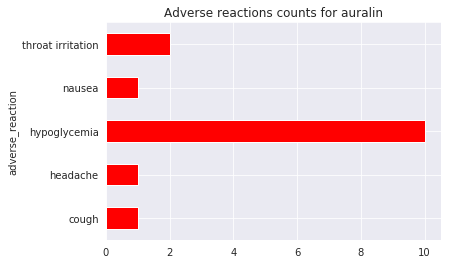

In [152]:
after_adverse_reactions.auralin.plot(kind = 'barh',
                                    title = 'Adverse reactions counts for auralin',
                                    color='r');

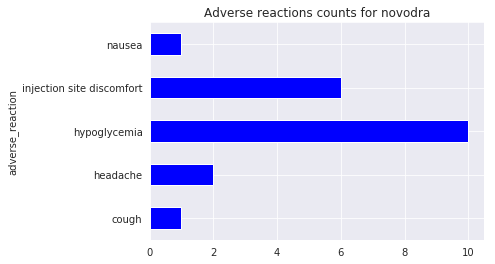

In [153]:
after_adverse_reactions.novodra.plot(kind = 'barh',
                                    title = 'Adverse reactions counts for novodra',
                                    color='b');

## Pre-trial / Post-trial Mean Insulin Dose Change(IU)

   Note: insulin is measured in international units of insulin (1 IU or 1u)

In [154]:
treatments_clean.sample(5)

,patient_id,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction
261,377,7.98,7.54,0.44,novodra,41,41,NaN
106,161,7.93,7.56,0.37,novodra,46,43,NaN
128,194,7.55,7.18,0.37,novodra,42,41,NaN
51,75,7.67,7.29,0.38,novodra,19,27,NaN
24,39,7.73,7.36,0.37,auralin,25,35,NaN


In [158]:
treatments_clean['dose_change'] = treatments_clean['dose_start'] - treatments_clean['dose_end']

In [162]:
after_mean = treatments_clean.groupby('treatment').mean()

In [177]:
after_mean.dose_change

treatment
auralin   -8.325714
novodra    0.385057
Name: dose_change, dtype: float64

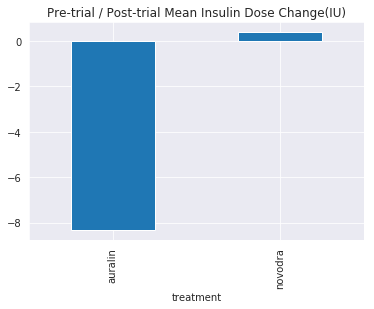

In [168]:
after_mean.dose_change.plot(kind='bar',title ='Pre-trial / Post-trial Mean Insulin Dose Change(IU)');

This is important because if the new oral insulin requires a way higher dosage to be effective, the manufacturer might not bring this to market.Requiring massive doses makes things financially infeasible and an economic problem for the manufacturer. 

The results here are good for auralin or atleast they're not bad. This negative eight's a bit misleading but its just the way the numbers were setup. This means that patients that were treated with auralin required on average, eight more units of insulin to establish a safe, steady blood sugar level. That's compared to novodra patients who on average required 0.4 units less of insulin, comparing their start dose and end dose, pre-trial and post-trial.

This isn't terrible that the fact that auralin required eight more units, this is kind of expected because we knew that oral insulin had a tougher time in getting to the bloodstream through the stomach lining, and eight units more isn't that big deal.

# Pre-trial / Post-trial Mean HbA1c change Before cleaning


In [174]:
auralin = (treatments.groupby('auralin').mean())['hba1c_change'].mean()
auralin

0.349927824421859

In [175]:
novodra = (treatments.groupby('novodra').mean())['hba1c_change'].mean()
novodra

0.7149766899766898

Before cleaning, novodra has a massive advantage in HbA1c reduction,0.71 compared to 0.35 for auralin. But this is before cleaning.

# Pre-trial / Post-trial Mean HbA1c change after cleaning


In [180]:
after_describe = treatments_clean.groupby('treatment').mean()

In [181]:
after_describe['hba1c_change']

treatment
auralin    0.387657
novodra    0.404713
Name: hba1c_change, dtype: float64

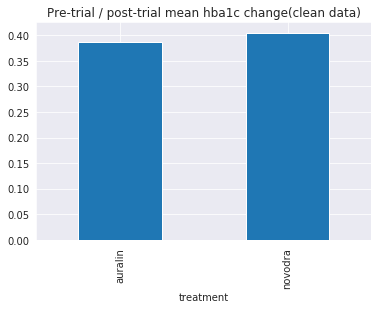

In [182]:
after_describe['hba1c_change'].plot(kind='bar',title='Pre-trial / post-trial mean hba1c change(clean data)');

And here's what it looks like after cleaning, 0.40 for novodra compared to 0.39 for auralin. That's much better. So these results are encouraging but clinical trial results require more rigorous statistical analysis to confirm these. 